In [1]:
'''
In this, you'll learn how to approach and build supervised learning models with the help of exploratory data analysis (EDA) 
on the Titanic data.

Supervised learning is the branch of Machine Learning (ML) that involves predicting labels, such as 'Survived' or 'Not'. 
Such models learn from labelled data, which is data that includes whether a passenger survived (called "model training"), 
and then predict on unlabelled data.

A platform for predictive modelling and analytics competitions, these are called train and test sets because

- You want to build a model that learns patterns in the training set, and
- You then use the model to make predictions on the test set.

The accuracy of the model tells us the percentage that we got correct values. 

A good way to approach supervised learning is the following:

- Perform an Exploratory Data Analysis (EDA) on your data set.
- Iterate this process. You will do more EDA and build another model;
- Engineer features: take the features that you already have and combine them or extract more information from them
- Get a model that performs better

'''

# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# Import test and train datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# View first lines of training data
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
'''
The target variable is the variable you are trying to predict.
Other variables known as "features" (or "predictor variables", the features that are using to predict the target variable).

Note that the df_test DataFrame doesn't have the 'Survived' column because this is what you will try to predict!
'''

# View first lines of test data
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [4]:
# Method to check out data types, missing values and more

df_train.info()

#In this case, you see that there are only 714 non-null values for the 'Age' column in a DataFrame with 891 rows.
#This means that are are 177 null or missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Method to check out summary statistics of numeric columns.

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


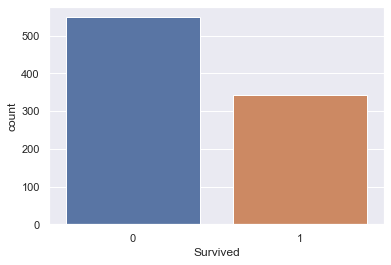

In [6]:
#Visual Exploratory Data Analysis (EDA) - to build a bar plot of Titanic survival, which is your target variable.

sns.countplot(x='Survived', data=df_train);

#In the training set, less people survived (value = 1) than didn't. 
#Let's then build a first model that predicts that nobody survived.

#This is a bad model as you know that people survived. But it gives us a baseline: any model that we build later needs 
#to do better than this one.

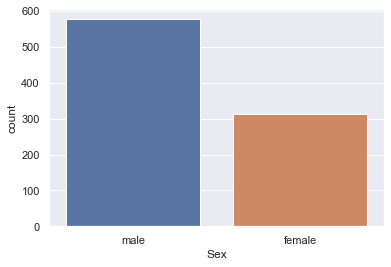

In [7]:
#EDA on Feature Variables - to build a bar plot of the Titanic dataset feature 'Sex' (of df_train).

sns.countplot(x='Sex', data=df_train);

C:\Users\Jay-Jaganath\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


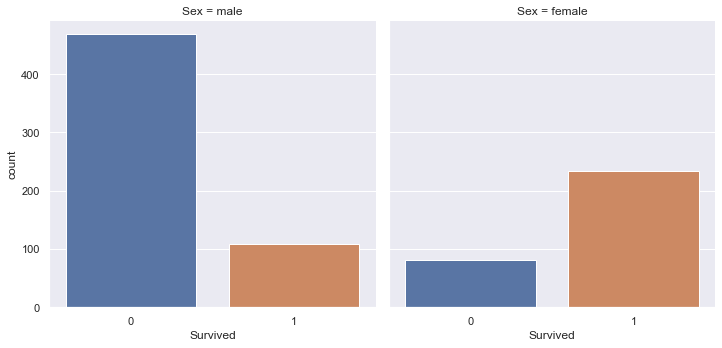

In [8]:
# To build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'.

sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);

#Observation - Women were more likely to survive than men.

In [9]:
# We can use pandas to figure out how many women and how many men survived:

df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [11]:
# To figure out the proportion of women that survived, along with the proportion of men:

print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

#74% of women survived, while 19% of men survived.

0.7420382165605095
0.18890814558058924


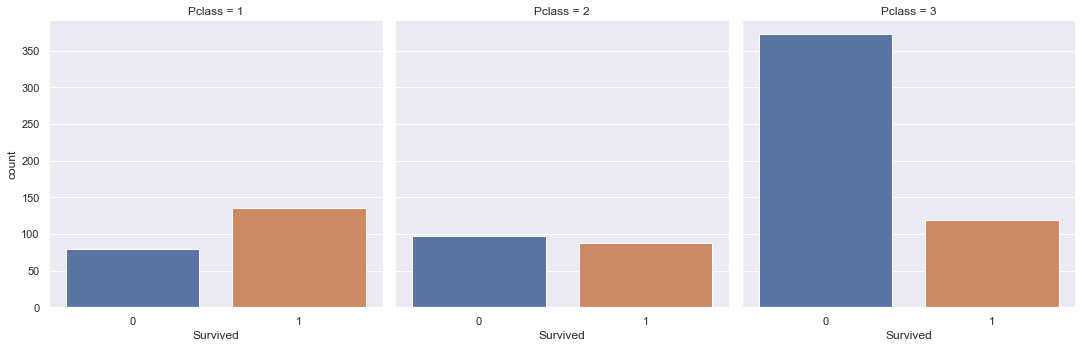

In [12]:
# To build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'.

sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);

#Observation - Passengers that travelled in first class were more likely to survive. On the other hand, passengers 
#travelling in third class were more unlikely to survive.

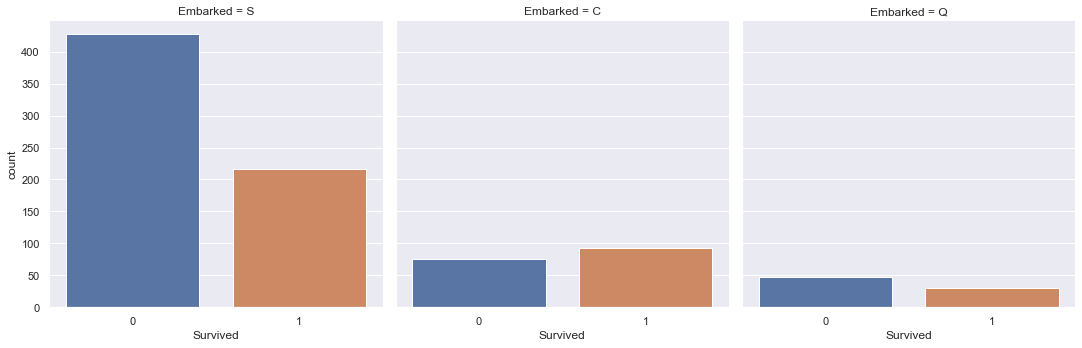

In [13]:
# To build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'.

sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train);

# Passengers that embarked in Southampton were less likely to survive.

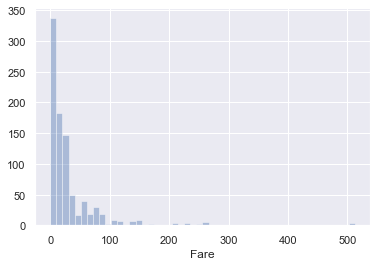

In [14]:
# EDA with Numeric Variables - to plot a histogram of the 'Fare' column of df_train.

sns.distplot(df_train.Fare, kde=False);

#Observation - Most passengers paid less than 100 for travelling with the Titanic

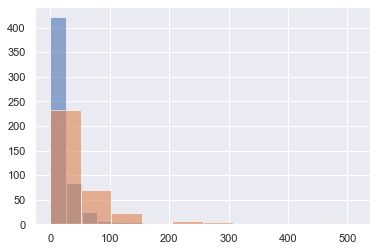

In [15]:
# Plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.

df_train.groupby('Survived').Fare.hist(alpha=0.6);

# Observation - It looks as though those that paid more had a higher chance of surviving.

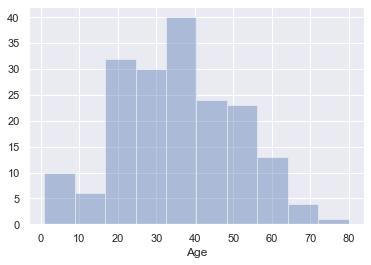

In [11]:
# To plot a histogram of the 'Age' column of df_train. You'll need to drop null values before doing so.

df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False);

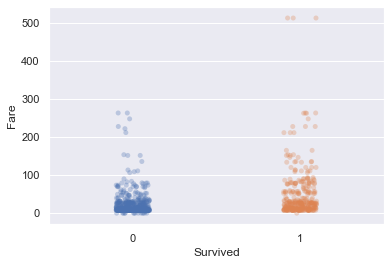

In [17]:
# To plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis.

sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True);

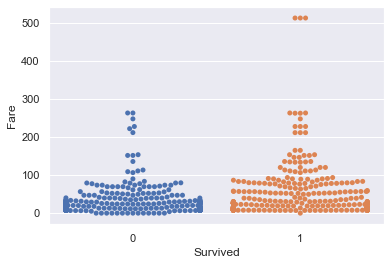

In [7]:
sns.swarmplot(x='Survived', y='Fare', data=df_train);

#Obsevation - Fare definitely seems to be correlated with survival aboard the Titanic.

In [8]:
# To check out summary statistics of 'Fare' as a function of survival.

df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


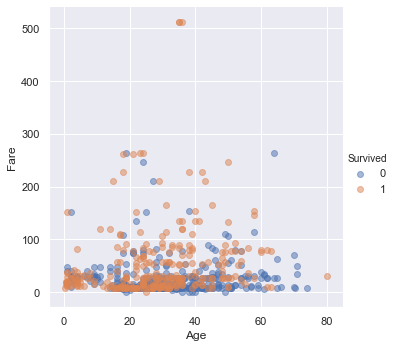

In [9]:
# To plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'

sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

# It looks like those who survived either paid quite a bit for their ticket or they were young.

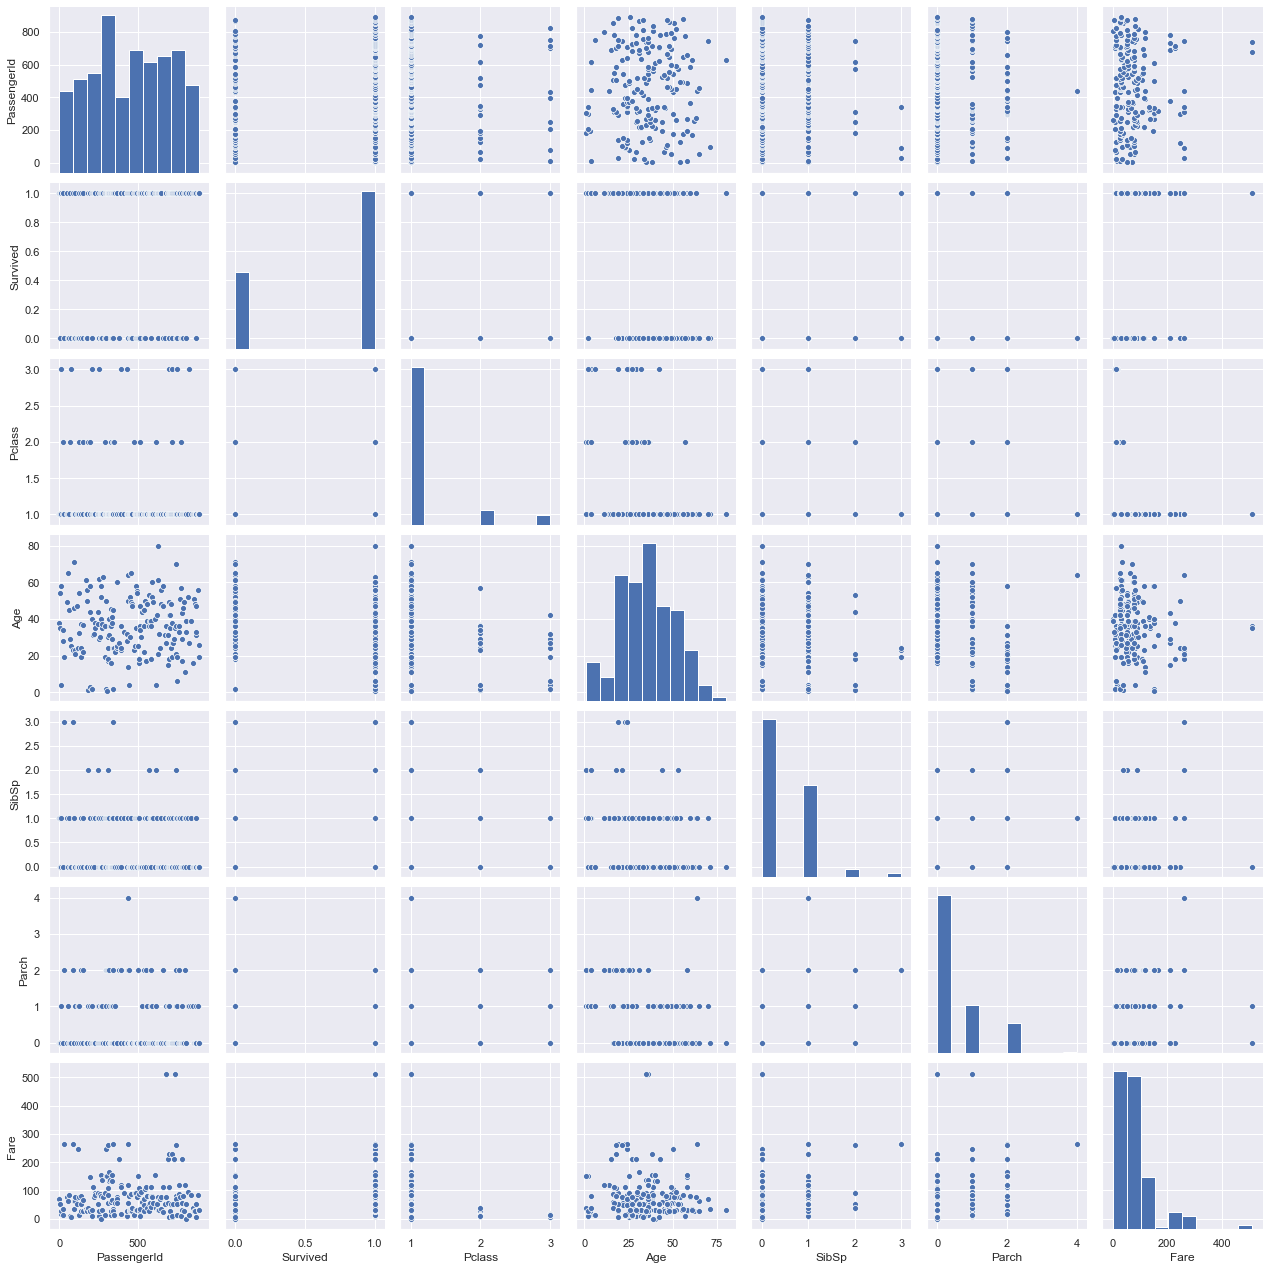

In [16]:
'''
To create a pairplot of df_train, colored by 'Survived'. A pairplot is a great way to display most of the information that 
you have already discovered in a single grid of plots
'''

#sns.pairplot(df_train_drop, hue='Survived', diag_kind='kde');
sns.pairplot(df_train_drop);

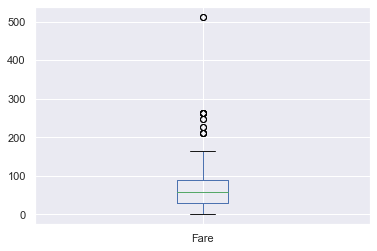

In [17]:
# To find the outliers
df_train_drop["Fare"].plot.box()
plt.show()

In [20]:
df_train_drop_corr=df_train_drop.corr()
df_train_drop_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


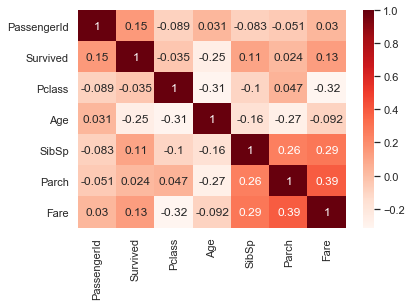

In [21]:
sns.heatmap(df_train_drop_corr,annot=True,cmap='Reds')
plt.show()

In [19]:
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 23.6+ KB
